In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Q1

In [7]:
# Dataset
data = [
    {'fruit_id': 1, 'weight': 180, 'sweetness_level': 7, 'label': 'Apple'},
    {'fruit_id': 2, 'weight': 200, 'sweetness_level': 6, 'label': 'Apple'},
    {'fruit_id': 3, 'weight': 150, 'sweetness_level': 4, 'label': 'Orange'},
    {'fruit_id': 4, 'weight': 170, 'sweetness_level': 5, 'label': 'Orange'},
    {'fruit_id': 5, 'weight': 160, 'sweetness_level': 6, 'label': 'Apple'},
    {'fruit_id': 6, 'weight': 140, 'sweetness_level': 3, 'label': 'Orange'}
]

# New fruit characteristics
new_fruit = {'weight': 165, 'sweetness_level': 5.5}

# Distance calculations
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def manhattan_distance(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def minkowski_distance(point1, point2, p=3):
    return (abs(point1[0] - point2[0])**p + abs(point1[1] - point2[1])**p)**(1/p)

# Calculate distances
distances = []
for fruit in data:
    point = (fruit['weight'], fruit['sweetness_level'])
    euclidean_dist = euclidean_distance((new_fruit['weight'], new_fruit['sweetness_level']), point)
    manhattan_dist = manhattan_distance((new_fruit['weight'], new_fruit['sweetness_level']), point)
    minkowski_dist = minkowski_distance((new_fruit['weight'], new_fruit['sweetness_level']), point)
    
    distances.append({
        'label': fruit['label'],
        'euclidean': euclidean_dist,
        'manhattan': manhattan_dist,
        'minkowski': minkowski_dist
    })

# Sort by Euclidean distance
distances.sort(key=lambda x: x['euclidean'])


In [8]:
# KNN Classification
k = 3
nearest_neighbors = distances[:k]

# Count the labels
label_count = {}
for neighbor in nearest_neighbors:
    label = neighbor['label']
    label_count[label] = label_count.get(label, 0) + 1

# Determine the most common label
predicted_label = max(label_count, key=label_count.get)

print(f"Predicted label for the new fruit: {predicted_label}")


Predicted label for the new fruit: Apple


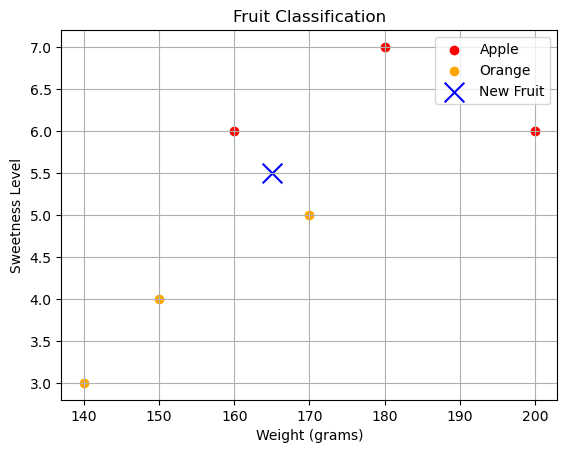

In [10]:
# Visualization of data points
def plot_data(data, new_fruit):
    for fruit in data:
        if fruit['label'] == 'Apple':
            plt.scatter(fruit['weight'], fruit['sweetness_level'], color='red', label='Apple' if 'Apple' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(fruit['weight'], fruit['sweetness_level'], color='orange', label='Orange' if 'Orange' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    plt.scatter(new_fruit['weight'], new_fruit['sweetness_level'], color='blue', marker='x', s=200, label='New Fruit')

    plt.title("Fruit Classification")
    plt.xlabel("Weight (grams)")
    plt.ylabel("Sweetness Level")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_data(data, new_fruit)


## Q1B

In [26]:
# Load data from CSV
data = pd.read_csv('fruits.csv')

# Features and labels
X = data[['weight', 'sweetness_level']].to_numpy()  # Convert to NumPy array
y = data['label'].to_numpy()  # Convert to NumPy array

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# New fruit characteristics
new_fruit = np.array([[165, 5.5]])

# KNN classification with scikit-learn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_encoded)

# Predict the label for the new fruit
predicted_label_encoded = knn.predict(new_fruit)
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)
print(f"Predicted label for the new fruit: {predicted_label[0]}")

# Calculate distances using different metrics
euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean').flatten()
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan').flatten()
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3).flatten()

# Combine the distances into a DataFrame for comparison
distances_df = pd.DataFrame({
    'Index': data.index,
    'Label': y,
    'Euclidean': euclidean_distances,
    'Manhattan': manhattan_distances,
    'Minkowski (p=3)': minkowski_distances
})

print(distances_df)


Predicted label for the new fruit: Orange
   Index   Label  Euclidean  Manhattan  Minkowski (p=3)
0      0   Apple  15.074813       16.5        15.004998
1      1   Apple  35.003571       35.5        35.000034
2      2  Orange  15.074813       16.5        15.004998
3      3  Orange   5.024938        5.5         5.001666
4      4   Apple   5.024938        5.5         5.001666
5      5  Orange  25.124689       27.5        25.008331


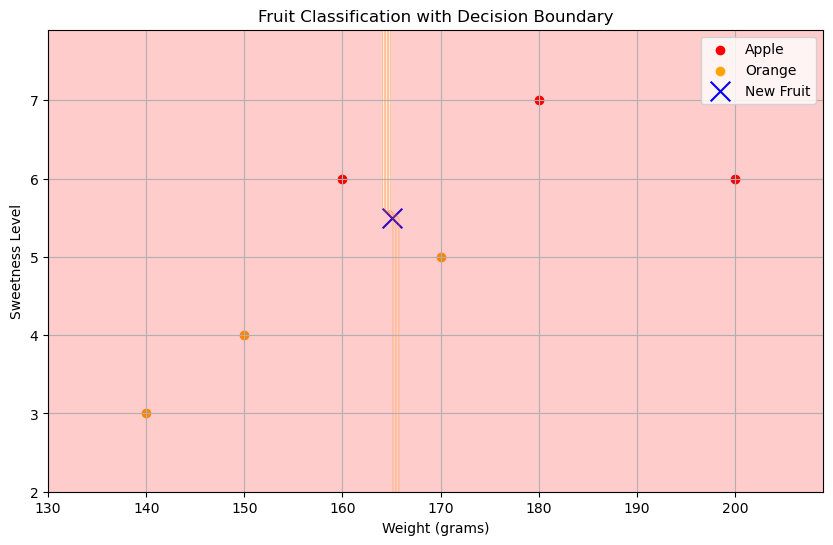

In [27]:
# Visualization
def plot_data(data, new_fruit, predicted_label):
    
    # Map colors to labels
    color_map = {'Apple': 'red', 'Orange': 'orange'}
    
    # Plot each fruit in the DataFrame
    for label in color_map.keys():
        subset = data[data['label'] == label]
        plt.scatter(subset['weight'], subset['sweetness_level'], color=color_map[label], label=label)

    # Plot the new fruit
    plt.scatter(new_fruit[0][0], new_fruit[0][1], color='blue', marker='x', s=200, label='New Fruit')

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))

    # Predict for the entire grid and reshape
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color map for the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'orange'])

    plt.title("Fruit Classification with Decision Boundary")
    plt.xlabel("Weight (grams)")
    plt.ylabel("Sweetness Level")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the data
plot_data(data, new_fruit, predicted_label)


## Q2

In [34]:
# Load the dataset
data = pd.read_csv('meds.csv')

# Function to calculate entropy
def calculate_entropy(target):
    value_counts = target.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts))
    return entropy

# Calculate entropy for the Diagnosis column
entropy_diagnosis = calculate_entropy(data['Diagnosis'])
print(f"Entropy of Diagnosis: {entropy_diagnosis:.4f}")

Entropy of Diagnosis: 1.0000


In [35]:
# Function to calculate information gain
def calculate_information_gain(data, feature, target):
    # Calculate the total entropy of the target
    total_entropy = calculate_entropy(data[target])
    
    # Calculate the weighted entropy for the feature
    weighted_entropy = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * calculate_entropy(subset[target])
    
    # Information gain is the difference between total entropy and weighted entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate information gain for each feature
features = ['Age', 'Blood_Pressure', 'Cholesterol']
info_gains = {feature: calculate_information_gain(data, feature, 'Diagnosis') for feature in features}

print("Information Gain for each feature:")
for feature, gain in info_gains.items():
    print(f"{feature}: {gain:.4f}")


Information Gain for each feature:
Age: 1.0000
Blood_Pressure: 1.0000
Cholesterol: 1.0000


In [36]:
# Determine the feature with the highest information gain
root_feature = max(info_gains, key=info_gains.get)
print(f"Root feature for the decision tree: {root_feature}")


Root feature for the decision tree: Age


In [37]:
# Decision Tree Node Class
class DecisionTreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, prediction=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.prediction = prediction

# Function to build the decision tree
def build_tree(data, target):
    # If all targets are the same, return a leaf node
    if len(data[target].unique()) == 1:
        return DecisionTreeNode(prediction=data[target].iloc[0])

    # If there are no features left to split, return a leaf node with the majority class
    if len(data.columns) == 1:  # Only target column left
        return DecisionTreeNode(prediction=data[target].mode()[0])

    # Calculate information gain for each feature
    info_gains = {feature: calculate_information_gain(data, feature, target) for feature in data.columns if feature != target}

    # Choose the best feature
    best_feature = max(info_gains, key=info_gains.get)
    tree = DecisionTreeNode(feature=best_feature)

    # Split the dataset by the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        child_node = build_tree(subset.drop(columns=[best_feature]), target)
        
        if subset.empty:  # If no data, assign the majority class
            child_node = DecisionTreeNode(prediction=data[target].mode()[0])

        if tree.left is None:
            tree.left = child_node
        else:
            tree.right = child_node

    return tree

# Build the decision tree
decision_tree = build_tree(data.drop(columns=['Patient_ID']), 'Diagnosis')


In [38]:
# Function to predict using the decision tree
def predict(tree, sample):
    while tree.prediction is None:
        if sample[tree.feature] == 'Low':
            tree = tree.left
        else:
            tree = tree.right
    return tree.prediction

# Predict for a 50-year-old patient with low blood pressure and normal cholesterol
new_patient = {'Age': 50, 'Blood_Pressure': 'Low', 'Cholesterol': 'Normal'}
prediction = predict(decision_tree, new_patient)
print(f"Predicted diagnosis for the patient: {prediction}")


Predicted diagnosis for the patient: Sick


## Q2B

Decision Tree Rules:
 |--- Blood_Pressure <= 0.50
|   |--- class: 1
|--- Blood_Pressure >  0.50
|   |--- class: 0



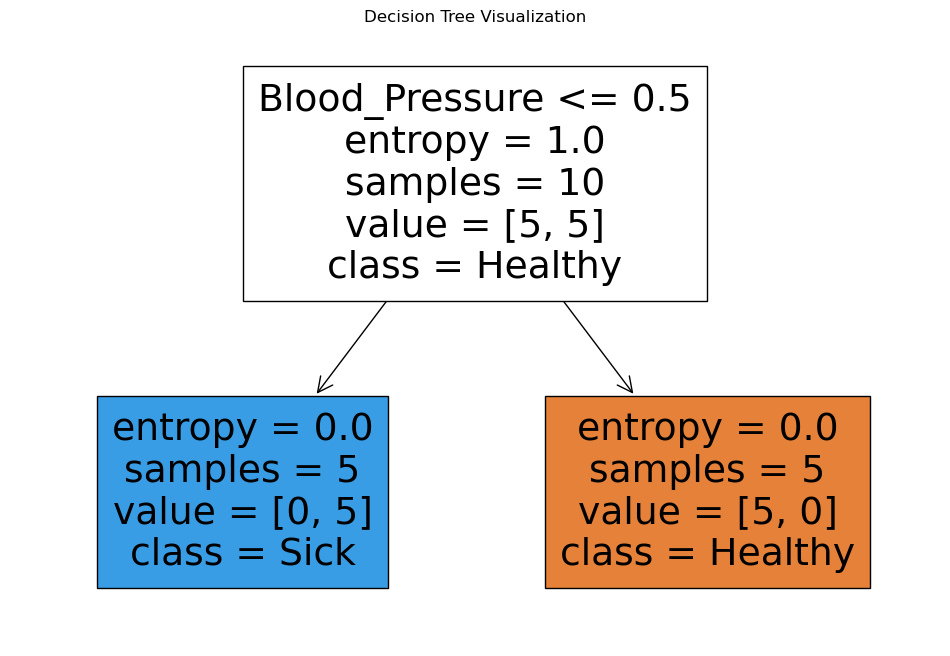

Predicted diagnosis for the patient: Sick


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Load the dataset
data = pd.read_csv('meds.csv')

# Encode categorical variables
label_encoders = {}
for column in ['Blood_Pressure', 'Cholesterol', 'Diagnosis']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features and target variable
X = data[['Age', 'Blood_Pressure', 'Cholesterol']]
y = data['Diagnosis']

# Build the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy
clf.fit(X, y)

# Print the decision tree structure
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['Diagnosis'].classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Make a prediction for a 50-year-old patient with low blood pressure and normal cholesterol
new_patient = [[50, 0, 0]]  # Low blood pressure = 0, Normal cholesterol = 0 (based on LabelEncoder)
prediction = clf.predict(new_patient)

# Decode the prediction back to original label
predicted_label = label_encoders['Diagnosis'].inverse_transform(prediction)
print(f"Predicted diagnosis for the patient: {predicted_label[0]}")